In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold

from preprocessing import preprocesamiento_basico
from graficos_modelos import mostrar_reporte_clasificacion, graficar_auc_roc,graficar_matriz_confusion
from funciones_auxiliares import traer_datasets, traer_dataset_prediccion_final, separar_dataset, encontrar_hiperparametros_RGSCV, mapear_target_binario

# Baseline (TP primera parte)

### Obtención de los datos y preprocesamiento

In [2]:
df, df_sin_target, solo_target = traer_datasets()

Aplicamos metodo de feature engineering general

In [3]:
dataframes_procesados = preprocesamiento_basico([df_sin_target])
df_baseline = dataframes_procesados[0]

### Definición de la baseline

A continuación, definimos el baseline utilizado en la primera parte del TP. Elegimos la segunda Baseline propuesta en ese trabajo práctico, pues es la más simple y resultaba en un accuracy bueno.

In [4]:
def baseline(df_baseline:pd.DataFrame):
    
    y_pred = []
    humedades_tarde = df_baseline['humedad_tarde']
    
    for humedad in humedades_tarde:
        if(humedad >= 79):
            y_pred.append('si')
        else:
            y_pred.append('no')
            
    return y_pred

### Predicción de la Baseline sobre el Dataset Original

Haremos que la baseline de la primera parte del trabajo práctico, prediga sobre el dataset entero, pero con los preprocesamientos aplicados en la segunda parte.

In [5]:
y_pred = baseline(df_baseline)

In [6]:
mapeo_binario_v = np.vectorize(mapear_target_binario)
y_pred_binario = mapeo_binario_v(y_pred)
#y_pred_proba = arbol_holdout.predict_proba(X_test.to_numpy())[:, 1]
y_test_binario = df['llovieron_hamburguesas_al_dia_siguiente'].map({'si': 1, 'no': 0}).to_numpy()
print(classification_report(df['llovieron_hamburguesas_al_dia_siguiente'].to_numpy(), y_pred))

              precision    recall  f1-score   support

          no       0.83      0.97      0.90     88282
          si       0.74      0.33      0.46     25447

    accuracy                           0.82    113729
   macro avg       0.79      0.65      0.68    113729
weighted avg       0.81      0.82      0.80    113729



### Curva AUC ROC


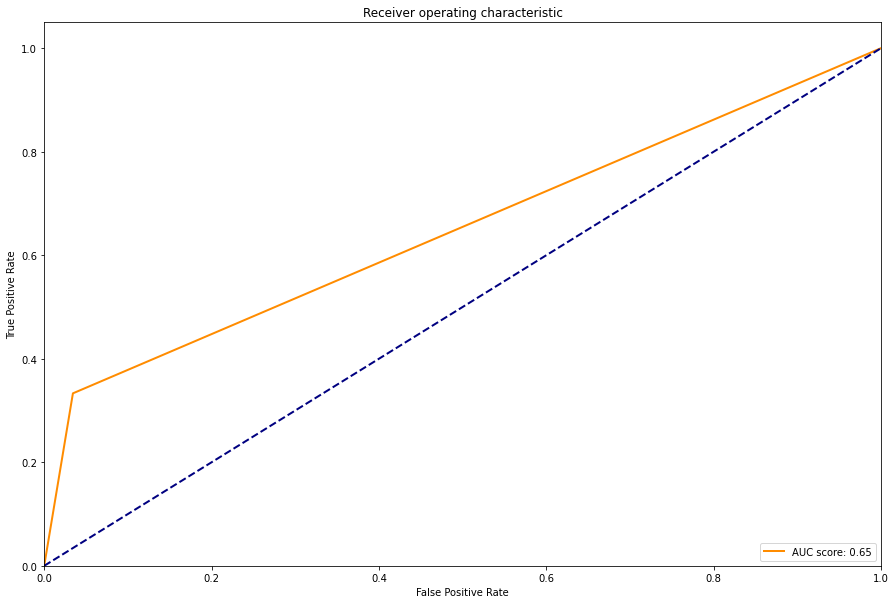

AUC-ROC para este modelo es: 0.6494066212119243


In [7]:
graficar_auc_roc(y_test_binario, y_pred_binario)

### Matriz de confusion

C:\Users\Guillermo\anaconda3\envs\orgadatos\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


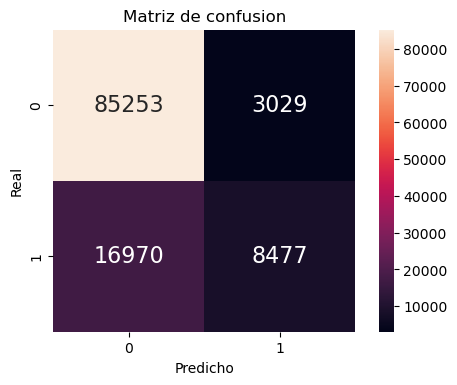

In [8]:
graficar_matriz_confusion(y_test_binario, y_pred_binario)